<a href="https://colab.research.google.com/github/PatraShivangi/ECG-Image-to-CSV-Converter/blob/main/ECG_Image_to_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

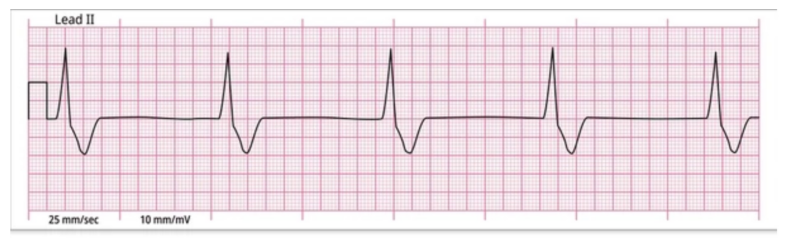

In [1]:
import cv2
import matplotlib.pyplot as plt
# Path
image_path = "/content/ecg3.jpg"

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


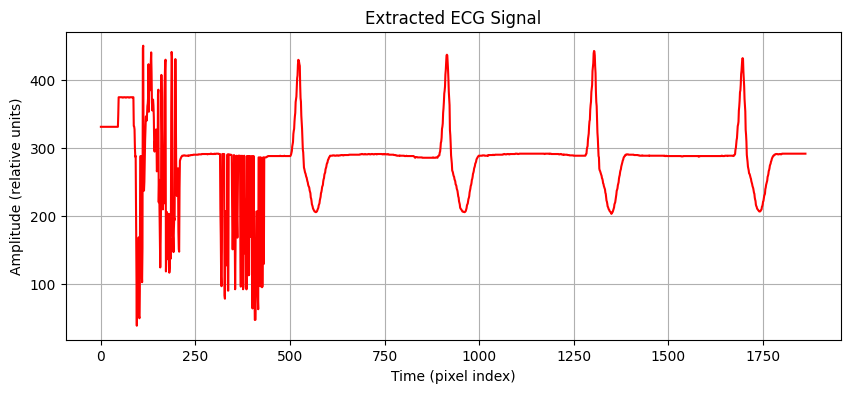

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#  Load and preprocess image
img = cv2.imread("/content/ecg3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Inverting colors so ECG line becomes white on black
inv = cv2.bitwise_not(gray)

# Threshold to make ECG line stand out
_, thresh = cv2.threshold(inv, 150, 255, cv2.THRESH_BINARY)

# Extract signal points
signal = []
for x in range(thresh.shape[1]):
    column = thresh[:, x]
    y_indices = np.where(column > 0)[0]
    if len(y_indices) > 0:
        signal.append(thresh.shape[0] - np.mean(y_indices))
    else:
        signal.append(np.nan)

# Converting to numpy array and smooth
signal = np.array(signal)
signal = np.interp(np.arange(len(signal)), np.arange(len(signal))[~np.isnan(signal)], signal[~np.isnan(signal)])

# Ploting the extracted digital signal
plt.figure(figsize=(10,4))
plt.plot(signal, color='red')
plt.title("Extracted ECG Signal")
plt.xlabel("Time (pixel index)")
plt.ylabel("Amplitude (relative units)")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
time = np.arange(len(signal))
data = pd.DataFrame({
    "Time_Index": time,
    "Amplitude": signal
})
# Save as CSV
data.to_csv("ecg_digital_signal.csv", index=False)

print("ECG digital signal saved as ecg_digital_signal.csv")


ECG digital signal saved as ecg_digital_signal.csv


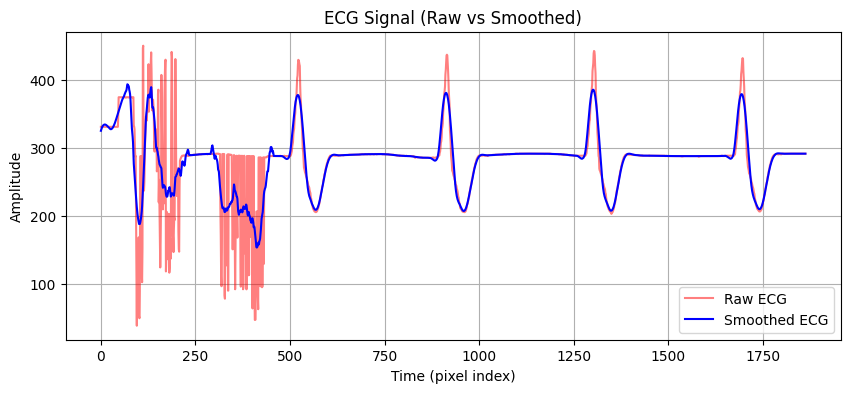

In [4]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
# Savitzky-Golay filter to smooth ECG
smoothed_signal = savgol_filter(signal, window_length=51, polyorder=3)
# Plot both raw and smoothed ECG
plt.figure(figsize=(10,4))
plt.plot(signal, color='red', alpha=0.5, label='Raw ECG')
plt.plot(smoothed_signal, color='blue', label='Smoothed ECG')
plt.title("ECG Signal (Raw vs Smoothed)")
plt.xlabel("Time (pixel index)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


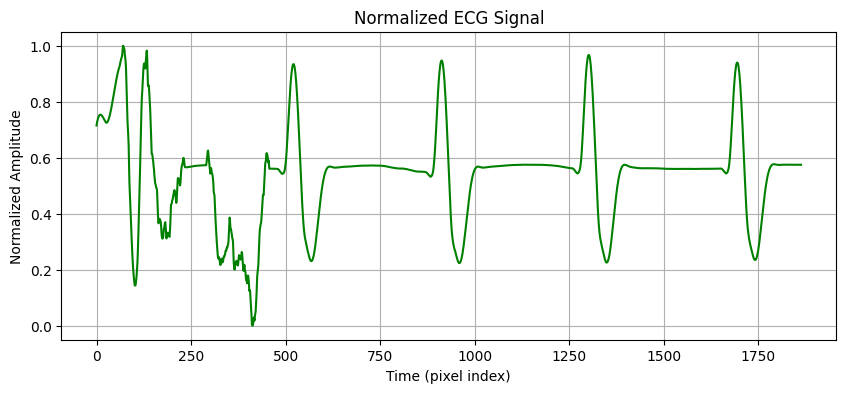

Normalized ECG saved as 'normalized_ecg.csv'


In [5]:
import numpy as np

#Normalize the smoothed ECG signal (0 to 1)
normalized_signal = (smoothed_signal - np.min(smoothed_signal)) / (np.max(smoothed_signal) - np.min(smoothed_signal))

# plot normalized signal
plt.figure(figsize=(10,4))
plt.plot(normalized_signal, color='green')
plt.title("Normalized ECG Signal")
plt.xlabel("Time (pixel index)")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()

# Saving normalized signal to a CSV file for ML
import pandas as pd
df = pd.DataFrame(normalized_signal, columns=['ECG'])
df.to_csv("normalized_ecg.csv", index=False)
print("Normalized ECG saved as 'normalized_ecg.csv'")
